Some of the imports for the good apples, bananas, guavas, oranges didn't upload properly into the files tab. If this becomes a problems during ML, re-upload this data

TRY ALSO MAKING A CLASSIFIER WITHIN THE QUALITY OF THE FOOD THEMSELVES

## Imports


In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets, models

import matplotlib.pyplot as plt

import numpy as np
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from PIL import Image
import random

import os

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Exploratory Data Analysis

Note: Because the data is in the form of images, it is hard to compare different classes on a graph. However, we can analyze how balanced the data classes are (how many of each type and quality of produce are shown).

### Produce Quality Visualization

In [ ]:
# Count number of images that are acceptable, bad, and good
# os.listdir lists the names of all the files and folders nested in a given folder in list form

# Variable storing number of acceptable fruit images stored here
acceptable_count = 0
# Find each fruit subfolder in accetable quality fruit and then loop through it
for produce_type in os.listdir("Fruit_Quality_Data/Acceptable_Quality_Fruit"):
    # Add the image count for each fruit subfolder to the acceptable_count
    acceptable_count = acceptable_count + len(os.listdir("Fruit_Quality_Data/Acceptable_Quality_Fruit/" + produce_type))

good_count = 0
for produce_type in os.listdir("Fruit_Quality_Data/Good_Quality_Fruit"):
    good_count = good_count + len(os.listdir("Fruit_Quality_Data/Good_Quality_Fruit/" + produce_type))

bad_count = 0
for produce_type in os.listdir("Fruit_Quality_Data/Bad_Quality_Fruit"):
    bad_count = bad_count + len(os.listdir("Fruit_Quality_Data/Bad_Quality_Fruit/" + produce_type))

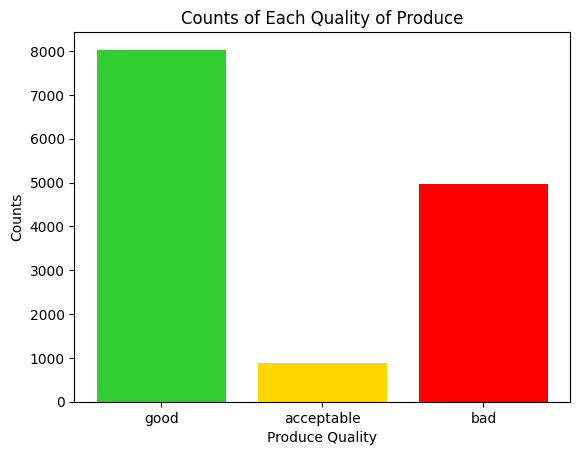

In [ ]:
labels = ['good', 'acceptable', 'bad']
counts = [good_count, acceptable_count, bad_count]
colors = ['#32CD32', '#FFD700', '#FF0000']

plt.figure()
plt.bar(labels, counts, color=colors)
plt.xlabel('Produce Quality')
plt.ylabel('Counts')
plt.title('Counts of Each Quality of Produce')
plt.show()

### Produce Type Visualization

In [ ]:
# This will store the counts of the different produce items (apple, banana, guava, etc.)
produce_type_dict = {'Apple': 0, 'Banana': 0, 'Guava': 0, 'Lemon': 0, 'Orange': 0, 'Pomegranate': 0}

for produce_quality in os.listdir("Fruit_Quality_Data"):
    for produce_type in os.listdir("Fruit_Quality_Data/" + produce_quality):
        if produce_type == 'Apple':
            produce_type_dict['Apple'] = produce_type_dict['Apple'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Apple"))
        if produce_type == 'Banana':
            produce_type_dict['Banana'] = produce_type_dict['Banana'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Banana"))
        if produce_type == 'Guava':
            produce_type_dict['Guava'] = produce_type_dict['Guava'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Guava"))
        if produce_type == 'Lemon':
            produce_type_dict['Lemon'] = produce_type_dict['Lemon'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Lemon"))
        if produce_type == 'Orange':
            produce_type_dict['Orange'] = produce_type_dict['Orange'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Orange"))
        if produce_type == 'Pomegranate':
            produce_type_dict['Pomegranate'] = produce_type_dict['Pomegranate'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Pomegranate"))

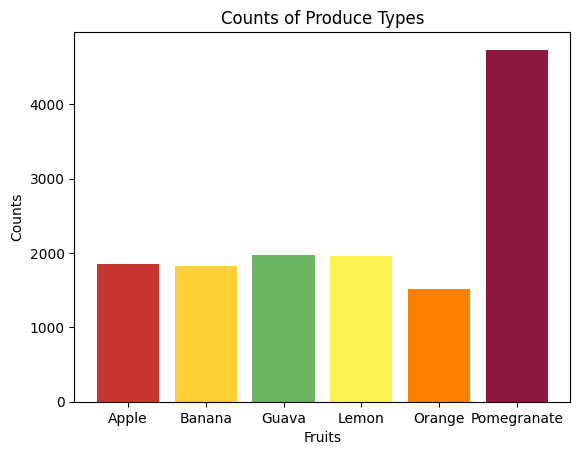

In [ ]:
# Define fruits and their corresponding ripe colors
fruits = ["apples", "bananas", "guavas", "lemons", "oranges", "pomegranates"]
colors = ["#C7372F", "#FFD135", "#69B562", "#FEF250", "#FF8100", "#8F163F"]

plt.figure()
# Create a bar chart
plt.bar(*zip(*produce_type_dict.items()), color=colors)

# Set the title and labels
plt.title("Counts of Produce Types")
plt.xlabel("Fruits")
plt.ylabel("Counts")

# Display the chart
plt.show()

### Produce Type and Quality Stacked Bar Visualization

In [ ]:
produce_type_quality_dict = {'Apple_Good': 0, 'Banana_Good': 0, 'Guava_Good': 0, 'Lemon_Good': 0, 
                     'Orange_Good': 0, 'Pomegranate_Good': 0, 'Apple_Acceptable': 0, 'Banana_Acceptable': 0,
                     'Guava_Acceptable': 0, 'Lemon_Acceptable': 0, 'Orange_Acceptable': 0, 
                     'Pomegranate_Acceptable': 0, 'Apple_Bad': 0, 'Banana_Bad': 0, 'Guava_Bad': 0, 
                     'Lemon_Bad': 0, 'Orange_Bad': 0, 'Pomegranate_Bad': 0}

for produce_quality in os.listdir("Fruit_Quality_Data"):
    for produce_type in os.listdir("Fruit_Quality_Data/" + produce_quality):
        if produce_quality == 'Good_Quality_Fruit':
            if produce_type == 'Apple':
                produce_type_quality_dict['Apple_Good'] = produce_type_quality_dict['Apple_Good'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Apple"))
            if produce_type == 'Banana':
                produce_type_quality_dict['Banana_Good'] = produce_type_quality_dict['Banana_Good'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Banana"))
            if produce_type == 'Guava':
                produce_type_quality_dict['Guava_Good'] = produce_type_quality_dict['Guava_Good'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Guava"))
            if produce_type == 'Lemon':
                produce_type_quality_dict['Lemon_Good'] = produce_type_quality_dict['Lemon_Good'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Lemon"))
            if produce_type == 'Orange':
                produce_type_quality_dict['Orange_Good'] = produce_type_quality_dict['Orange_Good'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Orange"))
            if produce_type == 'Pomegranate':
                produce_type_quality_dict['Pomegranate_Good'] = produce_type_quality_dict['Pomegranate_Good'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Pomegranate"))
        if produce_quality == 'Acceptable_Quality_Fruit':
            if produce_type == 'Apple':
                produce_type_quality_dict['Apple_Acceptable'] = produce_type_quality_dict['Apple_Acceptable'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Apple"))
            if produce_type == 'Banana':
                produce_type_quality_dict['Banana_Acceptable'] = produce_type_quality_dict['Banana_Acceptable'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Banana"))
            if produce_type == 'Guava':
                produce_type_quality_dict['Guava_Acceptable'] = produce_type_quality_dict['Guava_Acceptable'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Guava"))
            if produce_type == 'Lemon':
                produce_type_quality_dict['Lemon_Acceptable'] = produce_type_quality_dict['Lemon_Acceptable'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Lemon"))
            if produce_type == 'Orange':
                produce_type_quality_dict['Orange_Acceptable'] = produce_type_quality_dict['Orange_Acceptable'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Orange"))
            if produce_type == 'Pomegranate':
                produce_type_quality_dict['Pomegranate_Acceptable'] = produce_type_quality_dict['Pomegranate_Acceptable'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Pomegranate"))
        if produce_quality == 'Bad_Quality_Fruit':
            if produce_type == 'Apple':
                produce_type_quality_dict['Apple_Bad'] = produce_type_quality_dict['Apple_Bad'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Apple"))
            if produce_type == 'Banana':
                produce_type_quality_dict['Banana_Bad'] = produce_type_quality_dict['Banana_Bad'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Banana"))
            if produce_type == 'Guava':
                produce_type_quality_dict['Guava_Bad'] = produce_type_quality_dict['Guava_Bad'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Guava"))
            if produce_type == 'Lemon':
                produce_type_quality_dict['Lemon_Bad'] = produce_type_quality_dict['Lemon_Bad'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Lemon"))
            if produce_type == 'Orange':
                produce_type_quality_dict['Orange_Bad'] = produce_type_quality_dict['Orange_Bad'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Orange"))
            if produce_type == 'Pomegranate':
                produce_type_quality_dict['Pomegranate_Bad'] = produce_type_quality_dict['Pomegranate_Bad'] + len(os.listdir("Fruit_Quality_Data/" + produce_quality + "/Pomegranate"))

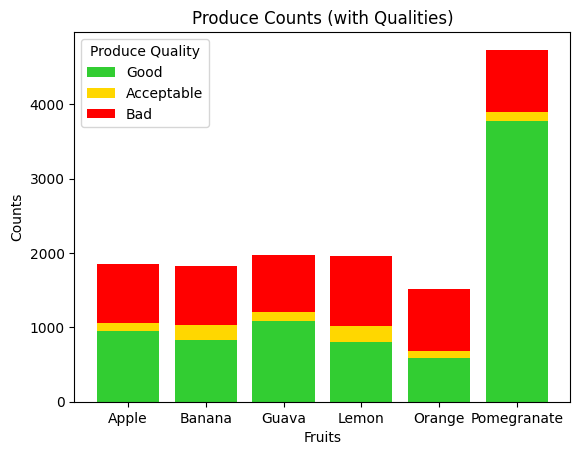

In [ ]:
x = ["Apple", "Banana", "Guava", "Lemon", "Orange", "Pomegranate"]
good_produce = np.array(list(produce_type_quality_dict.values())[:6])
acceptable_produce = np.array(list(produce_type_quality_dict.values())[6:12])
bad_produce = np.array(list(produce_type_quality_dict.values())[12:])

plt.figure()
# plot bars in stack manner
plt.bar(x, good_produce, color='#32CD32')
plt.bar(x, acceptable_produce, bottom=good_produce, color='#FFD700')
plt.bar(x, bad_produce, bottom=good_produce+acceptable_produce, color='#FF0000')

plt.xlabel("Fruits")
plt.ylabel("Counts")
plt.legend(["Good","Acceptable","Bad"], title = 'Produce Quality')
plt.title("Produce Counts (with Qualities)")
plt.show()

## Machine Learning

In [ ]:
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

In [ ]:
total_dir = "Fruit_Quality_Data"

In [ ]:
width_mean = 300
height_mean = 300

transform = transforms.Compose([transforms.CenterCrop((width_mean, height_mean)), transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])
total_set = datasets.ImageFolder(total_dir, transform)

In [ ]:
batch_size = 64

n = len(total_set)  # total number of examples
n_test = int(0.2 * n) # take 20% for test
n_val = int(0.1 * n) # take 10% for validation
n_train = int(0.7 * n) # take the other 70% for training
print('total_set: ', len(total_set), # verify the dataset separated correctly
      'test: ', n_test,
      'val: ', n_val,
      'train: ', n_train)

test_set, val_set, train_set = torch.utils.data.dataset.random_split(total_set, [n_test, n_val, n_train + 1])

train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle= True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size = batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, shuffle= False)

classes = ('Acceptable_Quality_Fruit', 'Bad_Quality_Fruit', 'Good_Quality_Fruit')

total_set:  13866 test:  2773 val:  1386 train:  9706


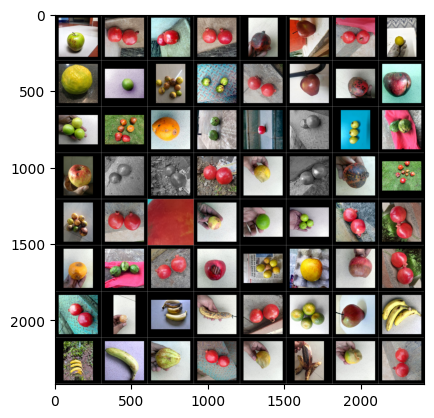

Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Acceptable_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Acceptable_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Acceptable_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Acceptable_Quality_Fruit Bad_Quality_Fruit Goo

In [ ]:
# functions to show an image

def showimg(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
showimg(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # For first number, use 1 for B/W images, use 3 for color images
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(5, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.do1 = nn.Dropout(0.4)
        self.do2 = nn.Dropout(0.3)
        self.fc1 = nn.Linear(1936, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.do1(x)
        x = F.relu(self.fc1(x))
        x = self.do1(x)
        x = F.relu(self.fc2(x))
        x = self.do2(x)
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay = 0.01)
optimizer = optim.Adam(net.parameters(), lr=0.005, weight_decay=0.001)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode ='min', factor=0.1, patience=2, threshold=0.025, threshold_mode='abs')

In [ ]:
epoch_list = []
train_loss_list = []
val_loss_list = []
accuracy_list = []

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    training_loss = 0.0
    val_loss = 0.0
    net.train()
    count = 1
    for data, target in train_loader:
      # print("train_loader: " + str(count) + "/" + str(len(train_loader)))
      if torch.cuda.is_available():
        data, target = data.cuda(), target.cuda()
      optimizer.zero_grad()
      output = net(data)
      loss = criterion(output, target)
      # print("loss:", loss.item())
      # scheduler.step(loss)
      loss.backward()
      optimizer.step()
      training_loss += loss.item() * data.size(0)
      count += 1


    # validate the model #
    net.eval()
    number_correct, number_data = 0, 0
    for data, target in val_loader:
      if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
      output = net(data)
      loss = criterion(output, target)
      # scheduler.step(loss)
      val_loss += loss.item() * data.size(0)

    # print statistics
    _, pred = torch.max(output, 1)
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy())
    number_correct += sum(correct)
    number_data += correct.shape[0]

    train_loss = training_loss / len(train_loader.dataset)
    val_loss = val_loss / len(val_loader.dataset)
    accuracy = (100 * number_correct / number_data)

    epoch_list.append(epoch)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    accuracy_list.append(accuracy)
    print('Epoch: {} \n-----------------\n \tTraining Loss: {:.6f} \t Validation Loss: {:.6f} \t accuracy : {:.4f}% '.format(epoch, train_loss, val_loss, accuracy))

net.to('cpu')

print('Finished Training')

Epoch: 0 
-----------------
 	Training Loss: 0.562935 	 Validation Loss: 0.308375 	 accuracy : 95.2381% 
Epoch: 1 
-----------------
 	Training Loss: 0.368808 	 Validation Loss: 0.259118 	 accuracy : 90.4762% 
Epoch: 2 
-----------------
 	Training Loss: 0.307026 	 Validation Loss: 0.234510 	 accuracy : 95.2381% 
Epoch: 3 
-----------------
 	Training Loss: 0.342750 	 Validation Loss: 0.241258 	 accuracy : 90.4762% 
Epoch: 4 
-----------------
 	Training Loss: 0.282541 	 Validation Loss: 0.209214 	 accuracy : 88.0952% 
Epoch: 5 
-----------------
 	Training Loss: 0.262329 	 Validation Loss: 0.195692 	 accuracy : 88.0952% 
Epoch: 6 
-----------------
 	Training Loss: 0.239346 	 Validation Loss: 0.233047 	 accuracy : 90.4762% 
Epoch: 7 
-----------------
 	Training Loss: 0.241524 	 Validation Loss: 0.322050 	 accuracy : 85.7143% 
Epoch: 8 
-----------------
 	Training Loss: 0.256529 	 Validation Loss: 0.186515 	 accuracy : 90.4762% 
Epoch: 9 
-----------------
 	Training Loss: 0.245056 	

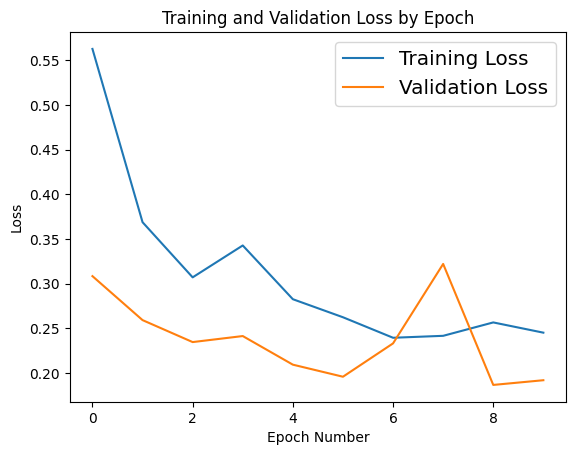

In [ ]:
# If training loss and validation loss converge and decrease with more epochs, then the fitting is done properly
plt.figure()
plt.plot(epoch_list, train_loss_list)
plt.plot(epoch_list, val_loss_list)
plt.title("Training and Validation Loss by Epoch")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"], fontsize="x-large")
plt.show()

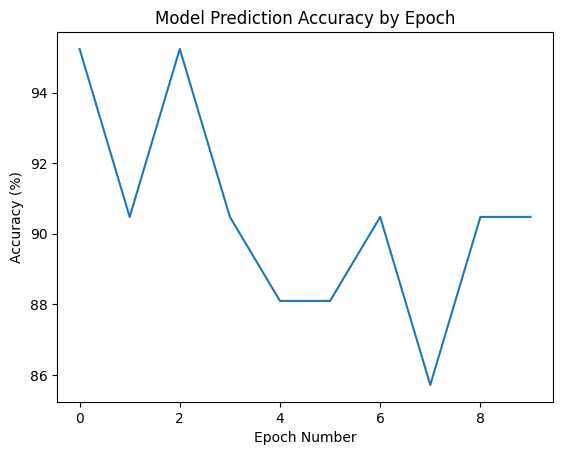

In [ ]:
plt.figure()
plt.plot(epoch_list,accuracy_list)
plt.title("Model Prediction Accuracy by Epoch")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy (%)")
plt.show()

In [ ]:
torch.save(net.state_dict(), "weights")

In [ ]:
model = Net()
model.load_state_dict(torch.load("weights"))
model.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (do1): Dropout(p=0.4, inplace=False)
  (do2): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=1936, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
)

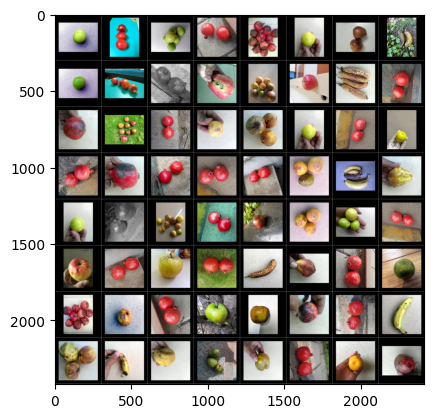

True labels:  Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Acceptable_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Acceptable_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Acceptable_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit

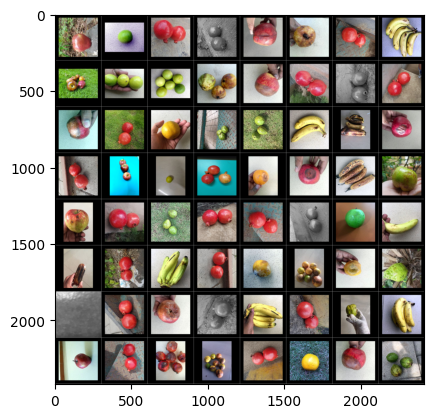

True labels:  Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Acceptable_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Bad_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Bad_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Good_Quality_Fruit Bad_Quality_Fruit Good_Quality_Fruit Good_Qua

In [ ]:
def test_model(numTests):


  for i in range(numTests):
    test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, shuffle= True, num_workers = 2)
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    labels = labels.cpu().detach().numpy()
    showimg(torchvision.utils.make_grid(images))
    print('True labels: ', ' '.join(f'{classes[label]}' for label in labels))
    outputs = net(images)
    _, preds = torch.max(outputs, 1)
    print('Predicted Labels: ', ' '.join(f'{classes[pred]}' for pred in preds))


test_model(2)

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    j = 0
    for data in test_loader:
        j+= 1
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print(j)

print(f'Accuracy of the network on the 240 test images: {100 * correct / total} %')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
Accuracy of the network on the 240 test images: 93.47277316985215 %


## Model Performance Visualizations

- Insert info here

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8f1cd6c8-680b-4589-b07b-165d4dffd570' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>